# Parsing Dates

## 1. Tutoriel

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("../Data/data1/catalog.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


Nous allons travailler avec la colonne "date" de la base de données des glissements de terrain.

In [3]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Oui, ce sont des dates ! Mais ce n'est pas parce que moi, un humain, que ce sont des dates, que Python sait que ce sont des dates. Notez qu'au bas de la sortie de head(), vous pouvez voir qu'il est indiqué que le type de données de cette colonne est "object".

    Pandas utilise le dtype "object" pour stocker divers types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères.

Si vous consultez la documentation de dtype du pandas, vous remarquerez qu'il existe également un dtype datetime64 spécifique. Parce que le dtype de notre colonne est object plutôt que datetime64, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons également regarder uniquement le dtype d'une colonne sans imprimer les premières lignes :

In [4]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

Vous devrez peut-être vérifier la documentation numpy pour faire correspondre le code de la lettre au type de l'objet. "O" est le code pour "object", donc nous pouvons voir que ces deux méthodes nous donnent les mêmes informations.

**Convertir nos colonnes de date en datetime**

Maintenant que nous savons que notre colonne de date n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme une date. C'est ce qu'on appelle le « parsing des dates » parce que nous prenons une chaîne et identifions ses composants.

Nous pouvons pandas quel est le format de nos dates avec un guide appelé "directive strftime", sur lequel vous pouvez trouver plus d'informations sur ce lien. L'idée de base est que vous devez indiquer où se trouvent les parties de la date et quelle ponctuation se trouve entre elles. Il existe de nombreuses parties possibles d'une date, mais les plus courantes sont %d pour le jour, %m pour le mois, %y pour une année à deux chiffres et %Y pour une année à quatre chiffres.

Quelques exemples:

    1/17/07 a le format "%m/%d/%y"
    17-1-2007 a le format "%d-%m-%Y"

En remontant l'en-tête de la colonne "date" dans le jeu de données sur les glissements de terrain, nous pouvons voir qu'elle est au format "mois/jour/année à deux chiffres", nous pouvons donc utiliser la même syntaxe que le premier exemple pour analyser nos dates :

In [5]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

Maintenant, lorsque je vérifie les premières lignes de la nouvelle colonne, je peux voir que le dtype est datetime64. Je peux également voir que mes dates ont été légèrement réorganisées afin qu'elles correspondent aux objets datetime de la commande par défaut (année-mois-jour).

In [6]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Maintenant que nos dates sont correctement analysées, nous pouvons interagir avec elles de manière utile.

Select the day of the month

Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

In [7]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

Si nous essayions d'obtenir les mêmes informations de la colonne "date" d'origine, nous obtiendrions une erreur : AttributeError : Can only use .dt accessor with datetimelike values. C'est parce que dt.day ne sait pas comment traiter une colonne avec le dtype "object". Même si notre dataframe contient des dates, nous devons les analyser avant de pouvoir interagir avec elles de manière utile.
Tracer le jour du mois pour vérifier l'analyse de la date

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() a des messages d'erreur très utiles, mais cela ne fait pas de mal de vérifier que les jours du mois que nous avons extraits ont un sens.

Pour ce faire, traçons un histogramme des jours du mois. Nous nous attendons à ce qu'il ait des valeurs comprises entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, une distribution relativement uniforme. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) Voyons si c'est le cas :

C:\Users\GHESMOMO\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

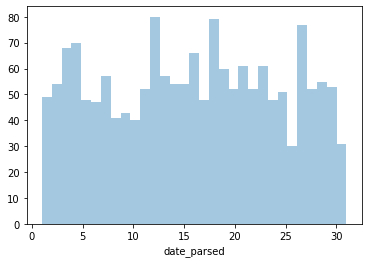

In [8]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

## 2. Exercice

Nous allons travailler avec un ensemble de données contenant des informations sur les tremblements de terre qui se sont produits entre 1965 et 2016.

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../Data/data1/database.csv")

# set seed for reproducibility
np.random.seed(0)

Vérifiez le type de données de notre colonne de date

Vous travaillerez avec la colonne "Date" de la base de données des tremblements de terre. Enquêtez maintenant sur cette colonne : semble-t-elle contenir des dates ? Quel est le type de la colonne ?

In [ ]:
# TODO:

Convertir nos colonnes de date en datetime

La plupart des entrées de la colonne "Date" suivent le même format : "mois/jour/année à quatre chiffres". Cependant, l'entrée à l'indice 3378 suit un schéma complètement différent. Exécutez la cellule de code ci-dessous pour voir cela.

In [ ]:
earthquakes[3378:3383]

Cela semble être un problème avec la saisie des données : idéalement, toutes les entrées de la colonne ont le même format. Nous pouvons avoir une idée de l'ampleur de ce problème en vérifiant la longueur de chaque entrée dans la colonne "Date".

In [ ]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

On dirait qu'il y a deux autres lignes qui ont une date dans un format différent. Exécutez la cellule de code ci-dessous pour obtenir les indices correspondant à ces lignes et imprimez les données.

In [ ]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Compte tenu de toutes ces informations, c'est à votre tour de créer une nouvelle colonne "date_parsed" dans l'ensemble de données sur les tremblements de terre qui contient des dates correctement analysées.

Remarque : Lorsque vous complétez ce problème, vous êtes autorisé (mais pas obligé) à modifier les entrées dans les colonnes « Date » et « Time ». Ne supprimez aucune ligne de l'ensemble de données.

In [ ]:
#TODO:

Sélectionnez le jour du mois

Créez un tremblement de terre day_of_month de la série Pandas contenant le jour du mois de la colonne "date_parse".

In [ ]:
# try to get the day of the month from the date column
day_of_month_earthquakes = ____

Tracer le jour du mois pour vérifier l'analyse de la date

Tracez les jours du mois à partir de votre jeu de données sur les tremblements de terre.

In [ ]:
#TODO: